#### This script tests the performance of the large missing data preparation function in `long_missing_data_prep()` and interpolation function in `data_impute()` for large missing data points, that is, missing days and months. The plots show before and after data imputation. 

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
module_path = os.path.abspath(os.path.join('..', 'demand_acep'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
module_path

'C:\\Users\\Yohan_Min\\DIRECT\\demand\\demand_acep\\demand_acep'

In [3]:
from demand_acep import data_impute
from demand_acep import long_missing_data_prep

In [4]:
dirpath = os.path.join(module_path, 'data/measurements/test_data')
filename = 'PQube3_comb.csv'

In [5]:
dirpath

'C:\\Users\\Yohan_Min\\DIRECT\\demand\\demand_acep\\demand_acep\\data/measurements/test_data'

In [8]:
test_df = long_missing_data_prep(dirpath, filename)

C:\Users\Yohan_Min\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


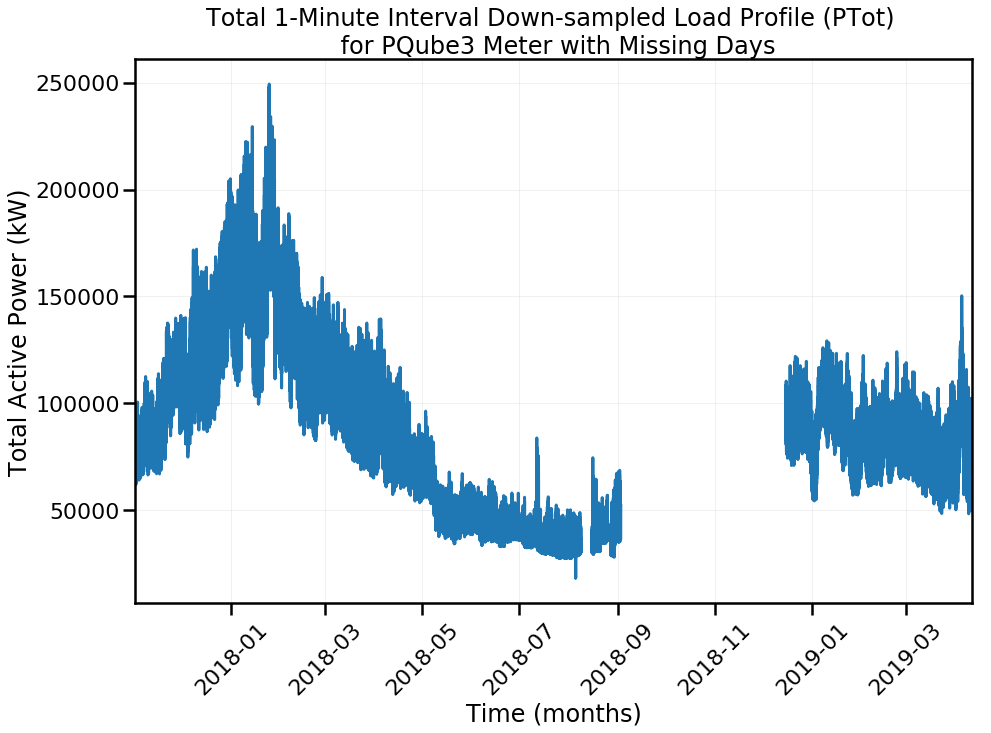

In [9]:
sns.set_context('poster')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.sca(ax)
plt.plot(test_df['PTot'])
plt.title('Total 1-Minute Interval Down-sampled Load Profile (PTot) \n for PQube3 Meter with Missing Days')
plt.xlabel('Time (months)')
plt.ylabel('Total Active Power (kW)')
plt.grid(linewidth=0.75, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xticks(rotation=45)
plt.show()

In [14]:
filled_df = data_impute(test_df)

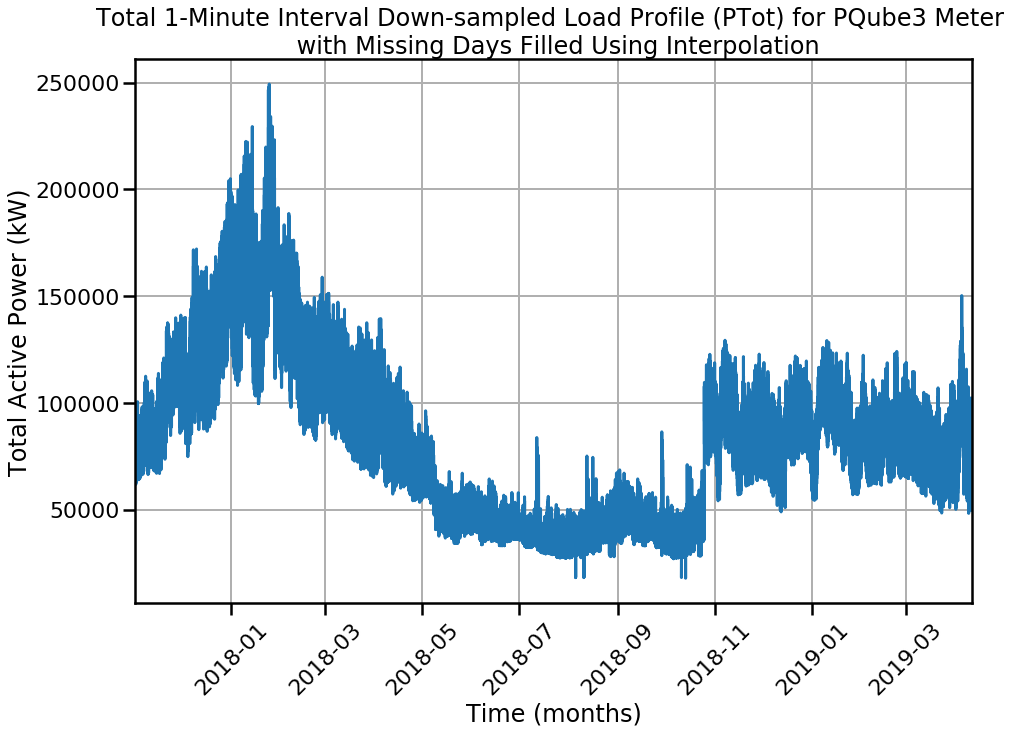

In [15]:
sns.set_context('poster')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.sca(ax)
plt.plot(filled_df['PTot'])
plt.title('Total 1-Minute Interval Down-sampled Load Profile (PTot) for PQube3 Meter \n '
          'with Missing Days Filled Using Interpolation')
plt.xlabel('Time (months)')
plt.ylabel('Total Active Power (kW)')
plt.grid()
plt.autoscale(enable=True, axis='x', tight=True)
plt.xticks(rotation=45)
plt.show()